### Chromium & Cobalt in file CRCO_J
#### Author: Kenneth Cochran 
#### Written on 4/4/2023

#### Gets rid of all rows that contain NA values and outputs the cleaned data to "Clean CRCO_J.xlsx"

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

result_dir = '~/Environmental Health Project - Part 2/result'
data_dir = '~/Environmental Health Project - Part 2/data'
in_file_name = 'CRCO_J.xlsx'
out_file_name = 'Clean CRCO_J.xlsx'

in_file_full_name = os.path.join(data_dir, in_file_name)
out_file_full_name = os.path.join(result_dir, out_file_name)

data_in = pd.read_excel(in_file_full_name)
data = data_in.drop(['Unnamed: 0'], axis = 1)
data_no_na = data.dropna()
data_no_na.to_excel(out_file_full_name)

C:\Users\kecoc\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### Computes the pearson correlation coefficient between every pair of variables and exports coefficients that are greater than 0.5 and less than 0.999 as a CSV file.

Heatmap of the filtered pearson correlation coefficient values
AxesSubplot(0.125,0.11;0.62x0.77)


C:\Users\kecoc\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\kecoc\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


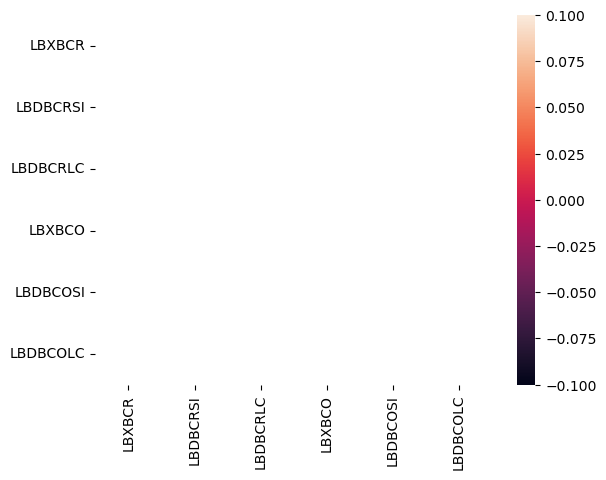

In [2]:
in_file_name = 'Clean CRCO_J.xlsx'
out_file_name = "CRCO_J_Filtered_Pearson_Correlation_Coefficient.csv"

in_file_full_name = os.path.join(result_dir, in_file_name) 
out_file_full_name = os.path.join(result_dir, out_file_name)

data_in = pd.read_excel(in_file_full_name) 
data = data_in.drop(['Unnamed: 0', 'SEQN'], axis = 1)

column_points = data.columns #Gets the labels for the final data frame
length = len(column_points) #Gets the amount of labels of the dataframe for the column and index so the final dataframe can be shaped correctly
values = [] #Creates an empty list that the pearson correlation coefficients will be stored in

for h in column_points: #Calculates the pearson correlation coefficient for every pair of columns
    for k in column_points:
        res = stats.pearsonr(data[h], data[k])
        values.append(res.statistic) #Stores the pearson correlation coefficient for each pair of columns in the values list

reshaped_values = np.array(values).reshape(length,length) #Creates a reshaped numpy array using the values list 
matrix = pd.DataFrame(reshaped_values, index = column_points, columns = column_points) #Creates a dataframe of the pearson correlation coefficient with the variables as the index and column 
filtered_matrix = matrix[(matrix > 0.50) & (matrix < 0.999)] #Filters the matrix to only show the values greater than 0.50 and less than 0.999

print("Heatmap of the filtered pearson correlation coefficient values")
print(sns.heatmap(filtered_matrix)) #Creates a heatmap of the filtered values 
filtered_matrix.to_csv(out_file_full_name) #Outputs the filtered matrix to a csv file 

#### Computes the p-values for the F statistic as well as the R^2 values for each pair of variables and exports the R2 values that are greater than 0.5 and less than 0.999 as a CSV file.

HeatMap of filtered R^2 values
AxesSubplot(0.125,0.11;0.62x0.77)


C:\Users\kecoc\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\kecoc\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


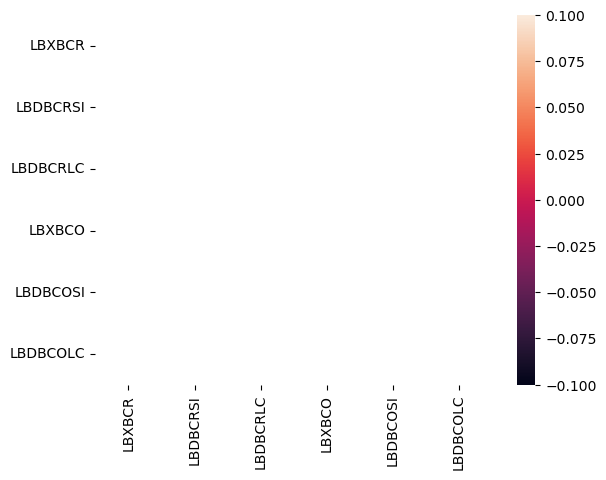

In [3]:
out_file_name = "CRCO_J_Filtered_R^2_values.csv"
out_file_full_name = os.path.join(result_dir, out_file_name)

P_values = [] #Creates an empty list that the P-values of the F statistic will be stored in
R_squared_values = [] #Creates an empty list that the R^2 values will be stored in

for h in column_points: #Calculates the pvalue of the f-statistic and r^2 value for each pair of variables
    for k in column_points:
        X2 = sm.add_constant(data[h])
        est = sm.OLS(data[k],X2)
        est2 = est.fit()
        P_values.append(est2.f_pvalue) #Appends the pvalue of the f-statistic to the p_values list
        R_squared_values.append(est2.rsquared) #Appends the r^2 value to the R_squared_values list

reshaped_p_values = np.array(P_values).reshape(length,length) #Reshapes the P_value list into a numpy array of the correct shape
p_value_matrix = pd.DataFrame(reshaped_p_values, index = column_points, columns = column_points) #Creates a dataframe of the P_values array with the variable names as the columns and indexs 


reshaped_R_squared_values = np.array(R_squared_values).reshape(length,length) #Reshapes the R_squared_values list into a numpy array of the correct shape
R_squared_values_matrix = pd.DataFrame(reshaped_R_squared_values, index = column_points, columns = column_points) #Creates a dataframe of the R_squared_values array with the variable names as the columns and indexs


filtered_matrix = R_squared_values_matrix[(R_squared_values_matrix > 0.50) & (R_squared_values_matrix < 0.999)] #Filters the R_squared_values matrix to only show values greater than 0.50 and less than 0.999

print("HeatMap of filtered R^2 values")
print(sns.heatmap(filtered_matrix))
filtered_matrix.to_csv(out_file_full_name) #Outputs the filtered matrix to a csv file 

The data indicates that there isn't a strong correlation between any of the variables in the CRCO_J file. Each measured pearson correlation coefficient and r^2 value is either under 0.50 or above 0.999. 